In [106]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [107]:
# Carregando dados
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

# Removendo colunas desnecessárias
del data["Dividends"]
del data["Stock Splits"]

# Limpeza de dados
data.dropna(inplace=True)

# Definindo X e y
X = data['Open'].values.reshape(-1, 1)
y = data['High'].values.reshape(-1, 1)


In [108]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [109]:
# Implementação da Floresta Aleatória
modelo_floresta = RandomForestRegressor(n_estimators=100, random_state=0)
modelo_floresta.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=0)

In [110]:
# Previsões
y_pred = modelo_floresta.predict(X_test)
y_pred

array([16.536448  , 23.33148342, 22.6375617 , 27.5193195 , 24.05494597,
       15.4841078 , 28.58398622, 22.39036867, 19.15868399, 18.08965483,
       24.50805432, 23.91210248, 22.81441663, 28.63358401, 17.98545792,
       22.51869048, 27.34121554, 28.26977576, 18.30151868, 18.0524425 ,
       19.86589413, 26.59146447, 23.85505   , 16.01575249, 18.09509724,
       28.54154139, 15.94006807, 27.47385654, 15.68506601, 22.51869048,
       27.509476  , 15.71775721, 15.68506601, 18.25722909, 26.33248795,
       26.20027774, 22.69969323, 27.18074202, 22.53895774, 23.56518816,
       23.46333191, 17.56273407, 26.96682789, 20.56434602, 19.14079634,
       14.50602227, 20.48538411, 23.70950047, 28.34656121, 15.74900278,
       26.50081168, 18.30151868, 22.52624016, 18.06970372, 15.86551697,
       15.26679098, 23.85505   , 17.75568843, 20.56434602, 22.26927384,
       17.86636393, 26.572621  , 27.09234285, 27.66290879, 22.82481164,
       20.06168936, 15.08872534, 28.62611633, 22.40920407, 19.42

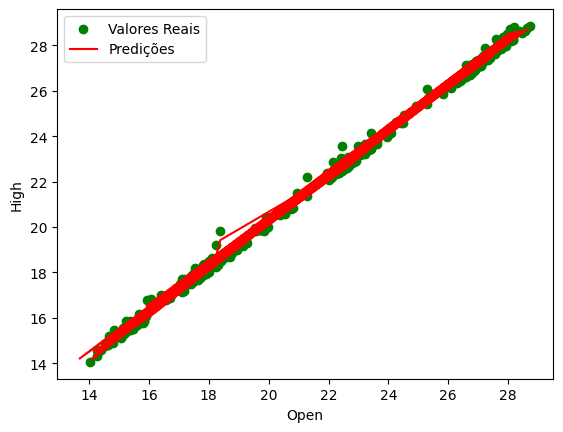

In [111]:
# Visualizando previsões
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [112]:
# Avaliação do modelo
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [113]:
# Exibindo métricas
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Percentual Absoluto Médio (MAPE): 0.752313213642586%
Erro Médio Absoluto (MAE): 0.159292323657488
Erro Quadrático Médio (MSE): 0.04447959584906055


In [114]:
# Últimos valores conhecidos
last_known_high = data.iloc[-3]['Open'].reshape(1, -1) # Último valor de 'Open' para prever o próximo 'High'

predicted_prices_high = []

# Prever os próximos 7 dias
for _ in range(3):
    next_price_high = modelo_floresta.predict(last_known_high)
    
    predicted_prices_high.append(next_price_high[0])
    
    # Atualizar last_known_prices para a próxima previsão
    last_known_high = next_price_high.reshape(1, -1)

print('Preços Previstos dos Proximos 3 dias:', predicted_prices_high)

Preços Previstos dos Proximos 3 dias: [np.float64(26.778820788401035), np.float64(26.897870117391996), np.float64(26.93623012549389)]
